<a href="https://colab.research.google.com/github/Will-GH001/Project/blob/main/Abalone_%E9%AE%91%E9%AD%9A%E5%B9%B4%E9%BD%A1%E9%A0%90%E6%B8%AC%E6%A8%A1%E5%9E%8B%E5%B0%88%E9%A1%8C_%EF%BC%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#資料集

##介紹

鮑魚的年齡是通過將殼切開錐體，染色並通過顯微鏡計算環的數量來確定的。這是一項無聊且耗時的任務，希望從物理測量中預測鮑魚的年齡。
https://archive.ics.uci.edu/ml/datasets/abalone

##匯入

In [ ]:
library(ggplot2)
library(dplyr)
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
aba=read.csv("/content/sample_data/Abalone.csv")
head(aba)

,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


##行名稱及類型

In [ ]:
str(aba)

'data.frame':	4177 obs. of  9 variables:
 $ Sex           : chr  "M" "M" "F" "M" ...
 $ Length        : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter      : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height        : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ Whole.weight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ Shucked.weight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ Viscera.weight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ Shell.weight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Rings         : int  15 7 9 10 7 8 20 16 9 19 ...


In [ ]:
names(aba)

[1] "Sex"            "Length"         "Diameter"       "Height"        
[5] "Whole.weight"   "Shucked.weight" "Viscera.weight" "Shell.weight"  
[9] "Rings"

##行列數量

In [ ]:
dim(aba)

[1] 4177    9

##遺漏值

In [ ]:
is.na(aba) %>% sum()
#查看遺漏值總數

[1] 0

In [ ]:
which(is.na(aba), arr.ind=TRUE)
#查看遺漏值行列

row,col


##統計摘要

所有數字欄位的中位數和平均值接近，表示沒有受到極端值影響，可以不做極端值得處理。

In [ ]:
summary(aba)

     Sex                Length         Diameter          Height      
 Length:4177        Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 Class :character   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.545   Median :0.4250   Median :0.1400  
                    Mean   :0.524   Mean   :0.4079   Mean   :0.1395  
                    3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
  Whole.weight    Shucked.weight   Viscera.weight    Shell.weight   
 Min.   :0.0020   Min.   :0.0010   Min.   :0.0005   Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300  
 Median :0.7995   Median :0.3360   Median :0.1710   Median :0.2340  
 Mean   :0.8287   Mean   :0.3594   Mean   :0.1806   Mean   :0.2388  
 3rd Qu.:1.1530   3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :1.4880   Max.   :0.7600   Max.   :1.0050  
     Rings       
 Min.   :

#資料分析

##各性別的資料量

公鮑魚較幼年鮑魚多了16%資料量，而公鮑魚較母鮑魚多了13%資料量，要注意公鮑魚資料對分析有無額外影響。

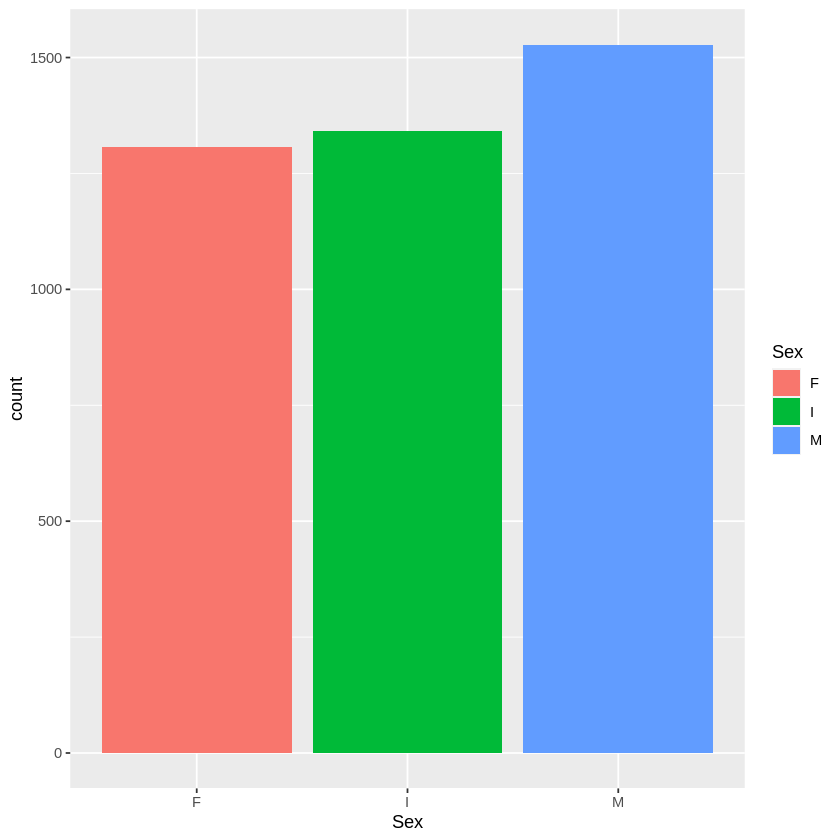

In [ ]:
ggplot(data=aba,aes(x=Sex,fill=Sex))+geom_bar() 
#各性別的資料量

In [ ]:
f.nrow = nrow(aba[aba$Sex == 'F',])
i.nrow = nrow(aba[aba$Sex == 'I',])
m.nrow = nrow(aba[aba$Sex == 'M',])
#各性別鮑魚的資料量

In [ ]:
(m.nrow - i.nrow) / i.nrow * 100
#公鮑魚較母鮑魚多了?%資料量

[1] 13.85991

In [ ]:
(m.nrow - f.nrow) / f.nrow * 100
#公鮑魚較幼年鮑魚多了?%資料量

[1] 16.90895

##各變數間的相關係數圖

殼重與年齡的相關性最高。



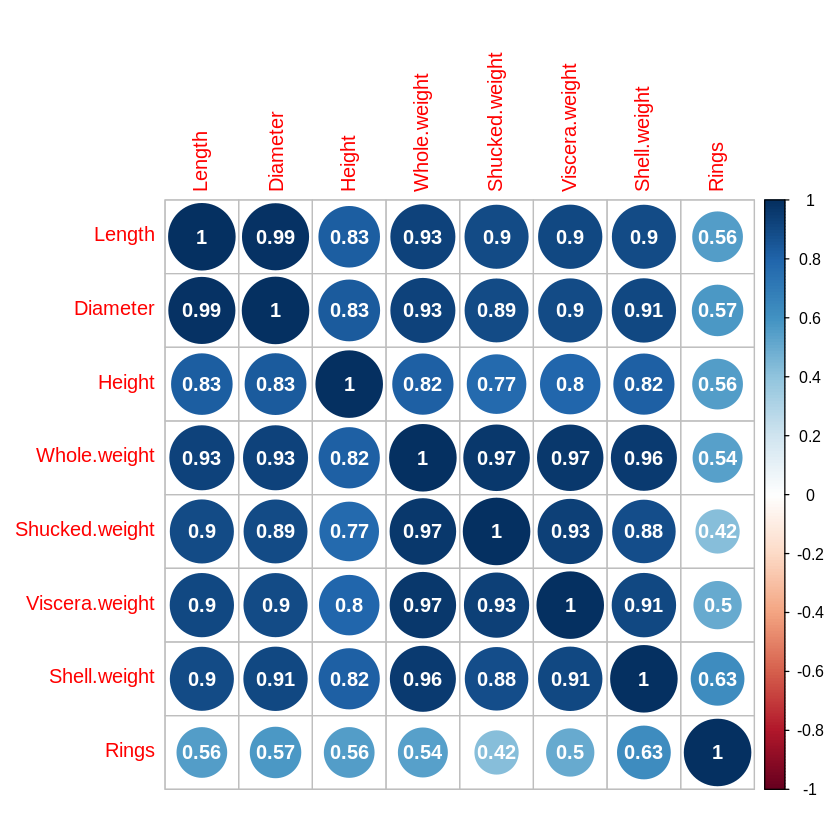

In [ ]:
corrplot(purrr::keep(aba, is.numeric) %>% cor(), addCoef.col ='white')
#各個變數間的相關係數圖

##年紀與殼重的分佈圖

1.發現隨著年紀增加，殼重開始無法區別年紀。

2.多數動物幼年時期，身體會隨成年記成長，這似乎也適用在鮑魚上。

`geom_smooth()` using formula 'y ~ x'



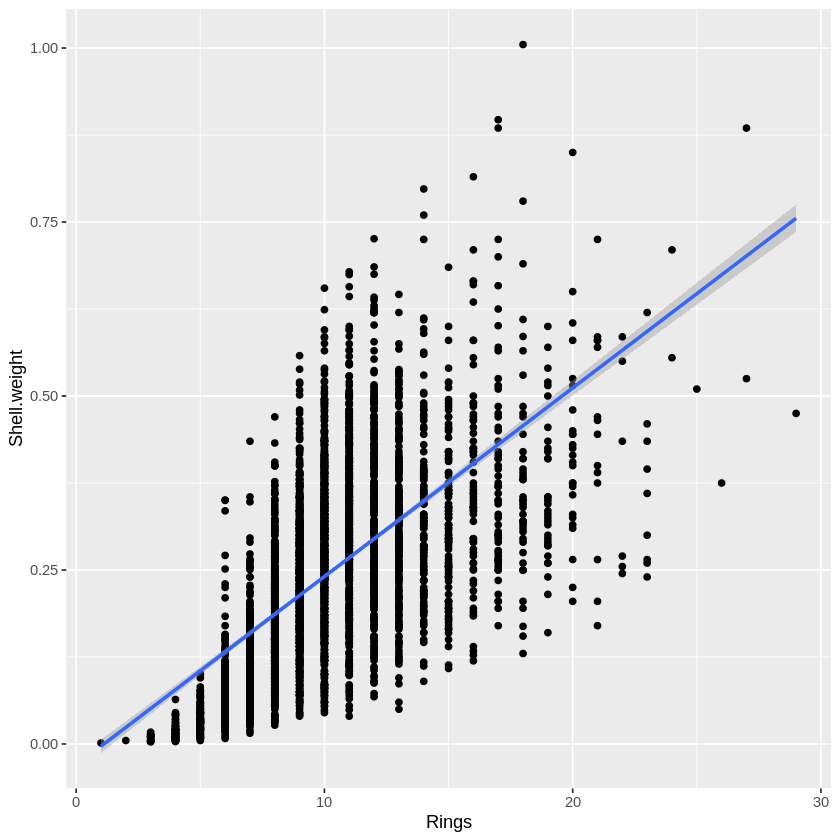

In [ ]:
ggplot(aba, aes(x=Rings, y=Shell.weight)) + 
          geom_point() + 
          xlab('Rings') +
          ylab('Shell.weight')+
          geom_smooth(method=lm)
#年紀與殼重的分佈圖

##幼年鮑魚年紀與殼重的關係

幼年鮑魚年紀與殼重的相關係數確實較高，符合前面提到幼年鮑魚身體會隨年紀成長的假設。預測鮑魚年齡是因為判斷很費力耗時，將幼年鮑魚獨立建模可以預測部分，這能降低判斷很費力耗時的痛點。

In [ ]:
aba.i <- aba[aba$Sex == 'I',]
#截取幼年鮑魚資料

`geom_smooth()` using formula 'y ~ x'



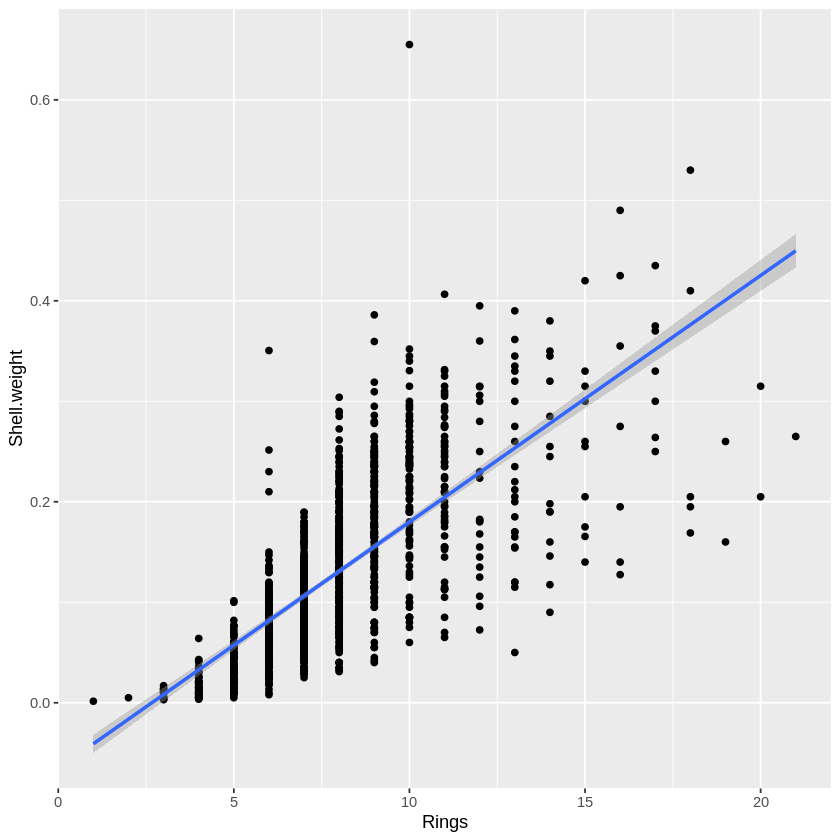

In [ ]:
ggplot(aba.i, aes(x=Rings, y=Shell.weight)) + 
          geom_point() + 
          xlab('Rings') +
          ylab('Shell.weight')+
          geom_smooth(method=lm)
#年紀與殼重的分佈圖

In [ ]:
cor(aba.i$Rings, aba.i$Shell.weight)
#計算相關係數

[1] 0.7254357

##公母鮑魚有無分開建模的需要

1.前面有提到公鮑魚較母鮑魚多了13%資料量，發現兩者年紀與殼重的相關性有差異，有分開建模的需要。

2.發現公鮑魚年紀與殼重的相關性較高，可能對應生物界中公的發育較慢的現象。

In [ ]:
aba.m <- aba[aba$Sex == 'M',]
#截取公鮑魚資料

In [ ]:
cor(aba.m$Rings, aba.m$Shell.weight)
#公鮑魚年紀與殼重的相關係數

[1] 0.5109967

`geom_smooth()` using formula 'y ~ x'



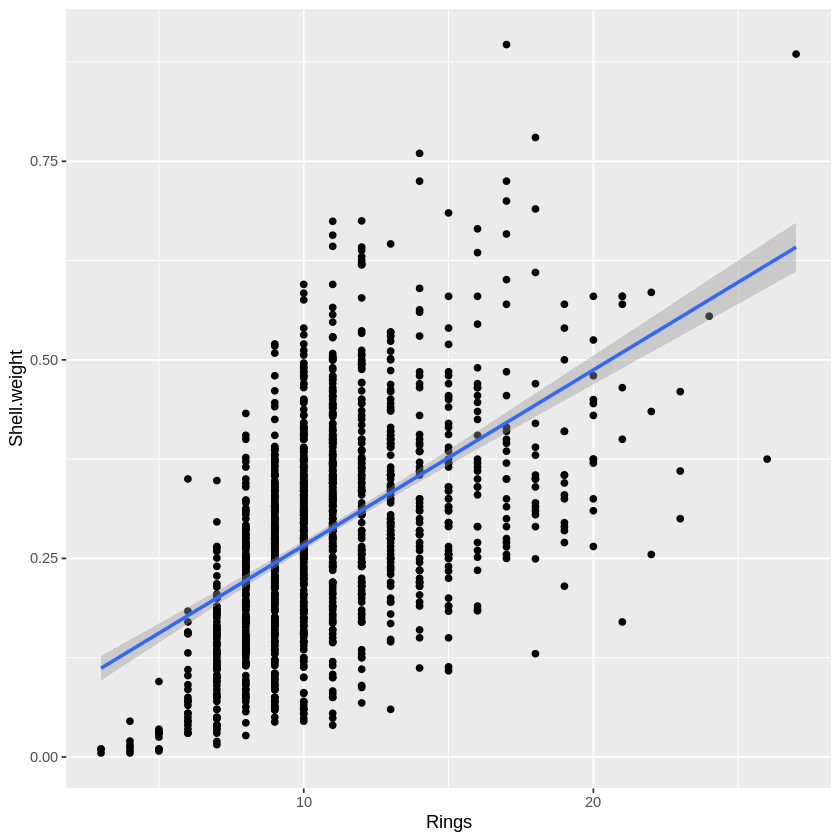

In [ ]:
ggplot(aba.m, aes(x=Rings, y=Shell.weight)) + 
          geom_point() + 
          xlab('Rings') +
          ylab('Shell.weight')+
          geom_smooth(method=lm)
#公鮑魚年紀與殼重的分佈圖

In [ ]:
aba.f <- aba[aba$Sex == 'F',]
#截取母鮑魚資料

In [ ]:
cor(aba.f$Rings, aba.f$Shell.weight)
#母鮑魚年紀與殼重的相關係數

[1] 0.405907

`geom_smooth()` using formula 'y ~ x'



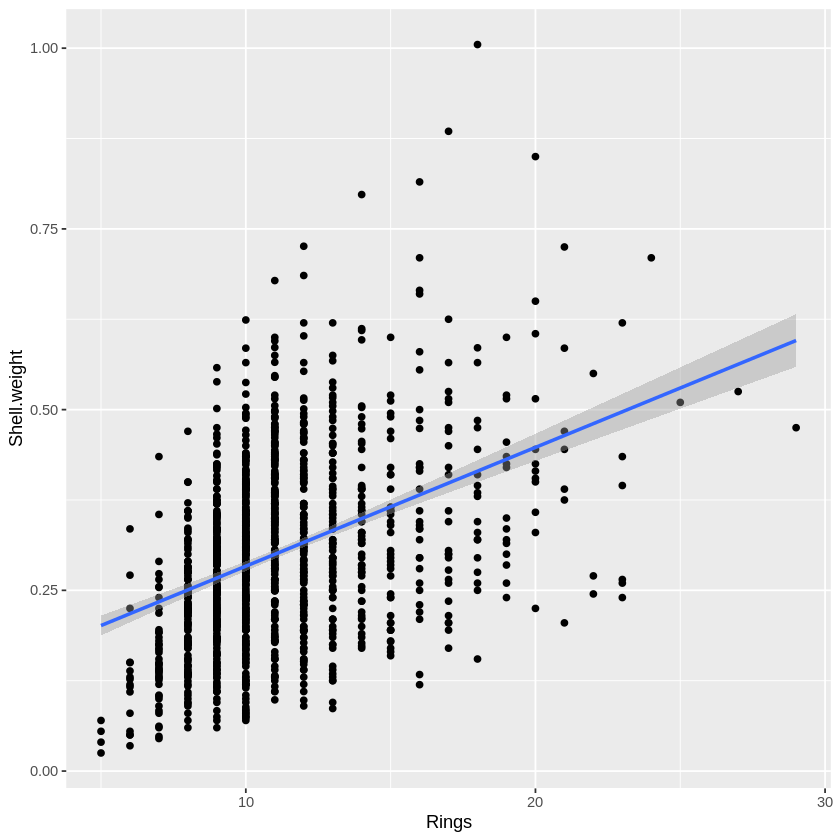

In [ ]:
ggplot(aba.f, aes(x=Rings, y=Shell.weight)) + 
          geom_point() + 
          xlab('Rings') +
          ylab('Shell.weight')+
          geom_smooth(method=lm)
#母鮑魚年紀與殼重的分佈圖

#模型訓練

In [ ]:
install.packages("caTools")
library(caTools)
install.packages("Metrics")
library(Metrics)
#模型訓練相關套件

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##幼年鮑魚年齡預測模型

R-squared為54.91%，擬合度和解釋程度可接受，而平均絕對百分誤差14.66%。

In [ ]:
set.seed(101)
#設定種子讓隨機結果可重複

In [ ]:
sample.i <- sample.split(aba.i$Shell.weight, SplitRatio = 0.50)
#切割資料為傳布林值
train.i = subset(aba.i, sample.i == TRUE)
#訓練集
test.i = subset(aba.i, sample.i == FALSE)
#測試集

In [ ]:
model.i <- lm(Rings ~ Shell.weight, train.i)
#模型訓練

In [ ]:
summary(model.i)
#模型摘要


Call:
lm(formula = Rings ~ Shell.weight, data = train.i)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6835 -0.9640 -0.2518  0.5793 10.5417 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.1532     0.1094   47.10   <2e-16 ***
Shell.weight  20.6569     0.6669   30.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.715 on 788 degrees of freedom
Multiple R-squared:  0.5491,	Adjusted R-squared:  0.5485 
F-statistic: 959.5 on 1 and 788 DF,  p-value: < 2.2e-16


In [ ]:
predict.i <- predict(model.i,test.i)
#用測試集做預測
result.i <- cbind(predict.i,test.i$Rings) 
colnames(result.i) <- c('pred','real')
result.i <- as.data.frame(result.i)
#將預測值和實際值合併成表格

In [ ]:
mape.i <- mape(result.i$real, result.i$pred)
mape.i
#平均絕對百分誤差

[1] 0.146672

##公鮑魚年齡預測模型

1.R-squared為28.35%，擬合度和解釋程度低，而MAPE為17.36%。

2.MAPE看似不高，但模型解釋程度低，表示數據本身變異數小，這不符合命題者的目標。

In [ ]:
set.seed(101)
#設定種子讓隨機結果可重複

In [ ]:
sample.m <- sample.split(aba.m$Shell.weight, SplitRatio = 0.50)
#切割資料為傳布林值
train.m = subset(aba.m, sample.m == TRUE)
#訓練集
test.m = subset(aba.m, sample.m == FALSE)
#測試集

In [ ]:
model.m <- lm(Rings ~ Shell.weight, train.m)
#模型訓練

In [ ]:
summary(model.m)
#模型摘要


Call:
lm(formula = Rings ~ Shell.weight, data = train.m)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4268 -1.7179 -0.6649  0.9515 14.2770 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    7.2798     0.1973   36.90   <2e-16 ***
Shell.weight  11.8485     0.6151   19.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.649 on 938 degrees of freedom
Multiple R-squared:  0.2835,	Adjusted R-squared:  0.2827 
F-statistic: 371.1 on 1 and 938 DF,  p-value: < 2.2e-16


In [ ]:
predict.m <- predict(model.m,test.m)
#用測試集做預測
result.m <- cbind(predict.m,test.m$Rings) 
colnames(result.m) <- c('pred','real')
result.m <- as.data.frame(result.m)
result.m %>% head()
#將預測值和實際值合併成表格

,pred,real
,<dbl>,<dbl>
1,9.057060,15
4,9.116302,10
12,8.879331,10
16,10.123429,12
20,8.642361,9
21,8.168419,11


In [ ]:
mape.m <- mape(result.m$real, result.m$pred)
mape.m
#平均絕對百分誤差

[1] 0.173644

##母鮑魚年齡預測模型

1.R-squared為18.4%，擬合度和解釋程度低，而MAPE為18.45%。

2.MAPE看似不高，但模型解釋程度低，表示數據本身變異數小，這不符合命題者的目標。

In [ ]:
set.seed(101)
#設定種子讓隨機結果可重複

In [ ]:
sample.f <- sample.split(aba.f$Shell.weight, SplitRatio = 0.50)
#切割資料為傳布林值
train.f = subset(aba.f, sample.f == TRUE)
#訓練集
test.f = subset(aba.f, sample.f == FALSE)
#測試集

In [ ]:
model.f <- lm(Rings ~ Shell.weight, train.f)
#模型訓練

In [ ]:
summary(model.f)
#模型摘要


Call:
lm(formula = Rings ~ Shell.weight, data = train.f)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3275 -1.8712 -0.7425  1.1556 13.8276 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.0746     0.2414   33.45   <2e-16 ***
Shell.weight   9.7101     0.7212   13.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.745 on 804 degrees of freedom
Multiple R-squared:  0.184,	Adjusted R-squared:  0.183 
F-statistic: 181.3 on 1 and 804 DF,  p-value: < 2.2e-16


In [ ]:
predict.f <- predict(model.f,test.f)
#用測試集做預測
result.f <- cbind(predict.f,test.f$Rings) 
colnames(result.f) <- c('pred','real')
result.f <- as.data.frame(result.f)
result.f %>% head()
#將預測值和實際值合併成表格

,pred,real
,<dbl>,<dbl>
7,11.27897,20
14,10.06520,10
15,9.87100,10
26,10.98766,11
27,10.84201,11
35,12.83258,13


In [ ]:
mape.f <- mape(result.f$real, result.f$pred)
mape.f
#平均絕對百分誤差

[1] 0.1845508

#結論

三個模型中，只有幼年有機會被採用。若能被採用，可降低判斷費力耗時的痛點，達成該資料集的目標。